In [1]:
import sys, os



%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.scenario import Scenario
from simulation_engine.scenarios.conf.binary_conf import BinaryConf
from simulation_engine.scenarios.conf.continuous_conf import ContinuousConf
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
from simulation_engine.algorithms.zhang_bareinboim import ZhangBareinboim
from simulation_engine.algorithms.apid import Apid
from simulation_engine.algorithms.apid_src.src.models.apid import APID

import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds
# from hydra import compose, initialize
# from omegaconf import OmegaConf

C:\Users\tmari\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
d:\TUM Workspace\Thesis Workspace\causal-bounds\simulation_engine\..\simulation_engine\algorithms\apid.py:233: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_name=f'config.yaml', config_path='./apid_src/config/')


In [ ]:
data = BinaryConf.generate_data_rolling_ate(N_simulations=1, n=10)
scenario = BinaryConf(data)
algs = ['ATE_zaffalonbounds']

algorithms = [alg for alg in scenario.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
algorithms
runtimes = scenario.run(algs)
# scenario.data['entropy_U'].describe()

TypeError: BinaryConf.__init__() takes 2 positional arguments but 3 were given

In [7]:
scenario.data

,seed,intercept_X,intercept_Y,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,U,X,Y,epsilon_X,sigma_X_vec,epsilon_Y,sigma_Y_vec,entropy_U,entropy_X,entropy_Y,squasher_X_name,squasher_Y_name,heteroskedasticity_structure,PNS_tianpearl_bound_lower,PNS_tianpearl_bound_upper,PNS_tianpearl_bound_width,PNS_tianpearl_bound_failed,PNS_tianpearl_bound_valid,ATE_tianpearl_bound_lower,ATE_tianpearl_bound_upper,ATE_tianpearl_bound_width,ATE_tianpearl_bound_failed,ATE_tianpearl_bound_valid,ATE_manski_bound_lower,ATE_manski_bound_upper,ATE_manski_bound_width,ATE_manski_bound_failed,ATE_manski_bound_valid
0,753065,1.086085,-0.483766,0.311835,-5.000000,1.748147,-0.749139,0.000034,0.008740,0.757879,0.771482,"[1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, ...","[1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0.49281249757118606, 1.2811873812890269, -0.2...","[0.5873550422812942, 0.8374699666381163, 2.892...","[0.5510193008399794, -0.022215116792455403, 0....","[0.33416329290429064, 2.078728808699465, 0.691...",0.778011,0.741483,0.629503,sigmoid,tanh_scaled,"sigma_i ~ |N(0,1)| for each unit",0.000000,0.012658,0.012658,False,True,-0.974684,-0.409524,0.565160,False,True,-1.000000,0.307896,1.307896,False,True
1,597966,-0.806372,0.141714,-1.364936,-1.666667,-1.460935,-0.290632,0.010752,0.065740,0.356373,0.452106,"[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, ...","[0.9349891983378935, 0.24098221459302796, -1.1...","[0.7364069545923876, 0.7823334321733463, 1.468...","[-0.0008938514592167954, 0.2280677034293044, -...","[0.37826988190187993, 0.9215066702193742, 0.12...",0.993342,0.763803,0.876346,sigmoid,tanh_scaled,"sigma_i ~ |N(0,1)| for each unit",0.000000,0.099099,0.099099,False,True,-0.801802,0.295630,1.097432,False,True,-1.000000,0.746914,1.746914,False,True
2,413102,1.172347,-0.825547,0.914827,1.666667,-1.492746,0.443006,0.469549,0.641690,0.198683,0.278147,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, ...","[0.9643971032453698, 0.2867214101187852, -0.06...","[1.4103576514925005, 0.5463677439173555, 0.049...","[-1.4138351344933, -1.4115133068601267, -0.031...","[1.250544349421247, 1.5307018364536986, 0.1824...",0.832723,0.717910,0.997402,probit,probit,"sigma_i ~ |N(0,1)| for each unit",0.434142,0.615960,0.181818,False,True,0.231920,0.636364,0.404443,False,True,-0.565858,1.000000,1.565858,False,True
3,347928,0.391156,-0.366790,-1.238230,5.000000,0.510992,0.545852,0.549555,0.980073,0.434220,0.128955,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, ...","[1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, ...","[1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, ...","[0.23520428290722223, 0.14371735502588734, 0.2...","[0.07418212122321417, 0.24220328577345568, 0.9...","[1.458314277778344, 0.04107777152479891, 4.041...","[1.8357266270101331, 0.058676615798399265, 2.6...",0.562898,0.991570,0.804876,tanh_scaled,sigmoid,"sigma_i ~ |N(0,1)| for each unit",0.494909,0.520179,0.025271,False,False,0.040359,0.949458,0.909100,False,True,-0.505091,1.000000,1.505091,False,True


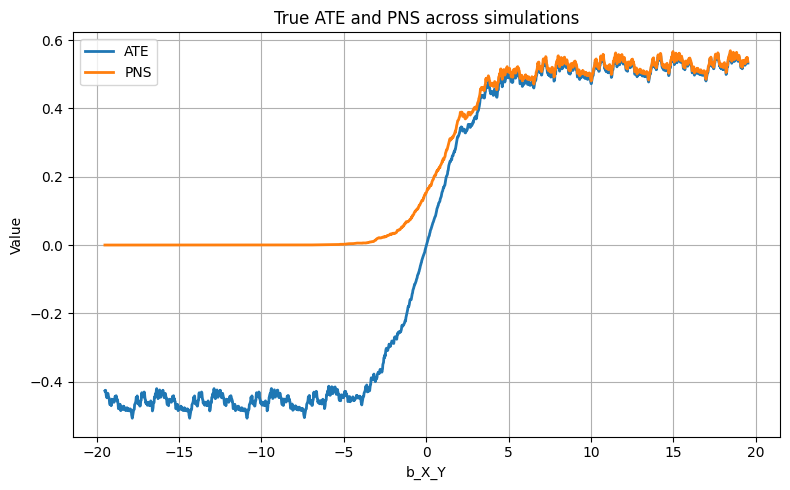

In [59]:
PlottingUtil.plot_ate_pns(BinaryConf.generate_data_rolling_ate(2000, b_lower=-20, b_upper=20), window=50)

      Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Bound Width Invalid Δ (%)
  PNS_tianpearl          0.00             0.00          0.5335      0.5335           N/A
PNS_causaloptim          0.00             0.00          0.5335      0.5335           N/A


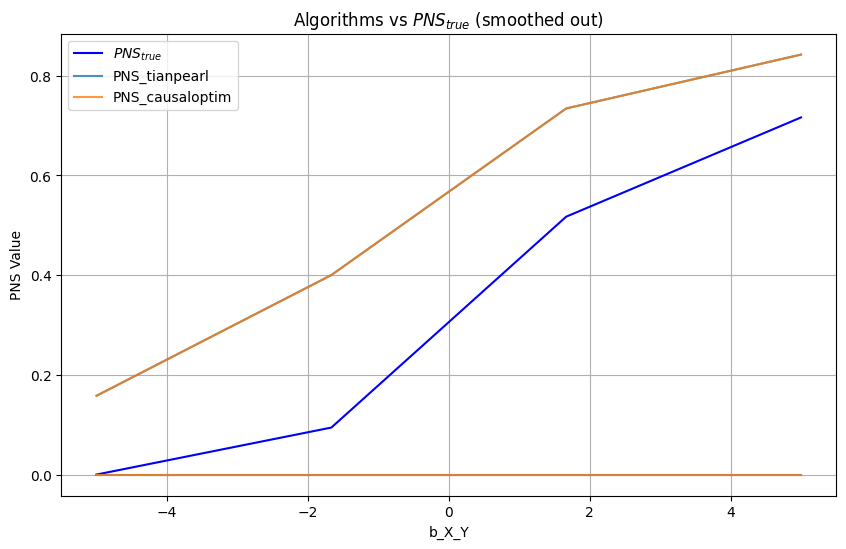

In [4]:
query = 'PNS'
ate_algs = PlottingUtil.extract_algorithm_names(scenario.data, query)
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(scenario.data, ate_algs)
PlottingUtil.plot_smoothed_query_vs_bounds(scenario.data, query, ate_algs, 1, False)

# Continous Test

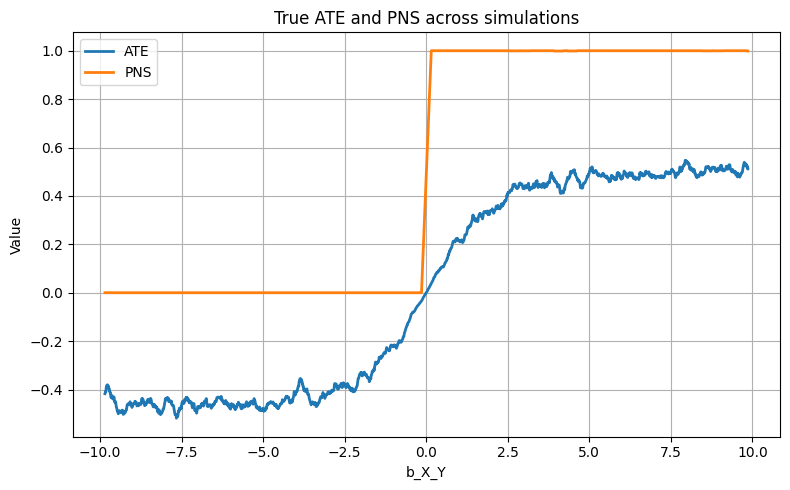

In [ ]:
function_keys = [
                "identity",
                "sin",
                "cos",
                "tanh",
                "log1p_abs",
                "exp_neg_sq",
                "sigmoid",
                "exp_clipped"
            ]

data = ContinuousConf.run_rolling_b_X_Y_simulations(
    b_range=(-5, 5), N_points=2000, replications=1, n=500,
)
PlottingUtil.plot_ate_pns(data,window=30)

In [34]:
data = ContinuousConf.run_rolling_b_X_Y_simulations(
        b_range=(-5, 5), N_points=200, replications=1, n=500)

scenario = ContinuousConf('IV DAG', data)
# scenario.binary.data
# algorithms = [alg for alg in scenario.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
results = scenario.run(['ATE_OLS-0.99'])

Running ATE_OLS-0.99...
ATE_OLS-0.99 completed in 0.79 seconds.
Total runtime: 0.79 seconds.


In [33]:
contIV.binaryIV.data

,seed,b_Z_X,b_U_X,b_X_Y,b_U_Y,p_Z,sigma_X,sigma_Y,sigma_U,g_U_X,g_U_Y,squash_X,squash_Y,g_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,Z,U,X,Y,Y_max,Y_min,X_max,X_min,X_mean,Y_mean,entropy_Z,entropy_X,ATE_causaloptim_bound_lower,ATE_causaloptim_bound_upper,ATE_causaloptim_bound_valid,ATE_causaloptim_bound_width,ATE_causaloptim_bound_failed,ATE_autobound_bound_lower,ATE_autobound_bound_upper,ATE_autobound_bound_valid,ATE_autobound_bound_width,ATE_autobound_bound_failed,ATE_zaffalonbounds_bound_lower,ATE_zaffalonbounds_bound_upper,ATE_zaffalonbounds_bound_valid,ATE_zaffalonbounds_bound_width,ATE_zaffalonbounds_bound_failed,ATE_entropybounds-0.80_bound_lower,ATE_entropybounds-0.80_bound_upper,ATE_entropybounds-0.80_bound_valid,ATE_entropybounds-0.80_bound_width,ATE_entropybounds-0.80_bound_failed,ATE_entropybounds-0.20_bound_lower,ATE_entropybounds-0.20_bound_upper,ATE_entropybounds-0.20_bound_valid,ATE_entropybounds-0.20_bound_width,ATE_entropybounds-0.20_bound_failed,ATE_entropybounds-0.10_bound_lower,ATE_entropybounds-0.10_bound_upper,ATE_entropybounds-0.10_bound_valid,ATE_entropybounds-0.10_bound_width,ATE_entropybounds-0.10_bound_failed
0,278722,0.537032,-0.829288,-10.0,0.592425,0.558601,0.542571,0.037940,1.082761,sigmoid_shifted,zero_centered_tanh,tanh_scaled,probit,zero_centered_tanh,-0.332640,0.0,0.158655,0.491296,"[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, ...","[-0.7732143555552399, -1.9339077684732389, -0....","[0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.713314,0.158655,1,0,0.446,0.352749,0.992774,0.991570,-0.675556,0.044040,True,0.719596,False,-0.675556,0.135758,True,0.811313,False,-0.5585,-0.0565,True,0.5020,False,-0.722996,0.239163,True,0.962159,False,-0.701127,-0.098180,True,0.602946,False,-0.654482,-0.237055,True,0.417427,False
1,624717,-0.469777,-0.407425,10.0,-1.015155,0.242999,1.520538,0.839096,0.015680,sigmoid_shifted,log1p_abs,probit,sigmoid,log1p_abs,0.304338,1.0,0.915802,0.611463,"[1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, ...","[-0.024654289719913212, -0.030400917327729184,...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0.930333,0.500087,1,0,0.408,0.735544,0.791699,0.975438,-0.502547,0.280686,False,0.783233,False,-1.000000,1.000000,True,2.000000,True,-0.4647,0.0030,False,0.4677,False,-0.261338,0.703996,True,0.965334,False,0.090647,0.686207,True,0.595560,False,0.235557,0.643087,True,0.407530,False


                     Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width Avg. Invalid dist. Bound Width Invalid Δ (%)
                  ATE_OLS-0.99          0.00            67.50          0.1276                NaN      1.3915          5.22
       ATE_causaloptim--binned           N/A              N/A             N/A                N/A         NaN           NaN
         ATE_autobound--binned           N/A              N/A             N/A                N/A         NaN           NaN
    ATE_zaffalonbounds--binned           N/A              N/A             N/A                N/A         NaN           NaN
                  ATE_OLS-0.98           N/A              N/A             N/A                N/A         NaN           NaN
                  ATE_OLS-0.95           N/A              N/A             N/A                N/A         NaN           NaN
ATE_entropybounds-0.80--binned           N/A              N/A             N/A                N/A         NaN           NaN
ATE_entropybound

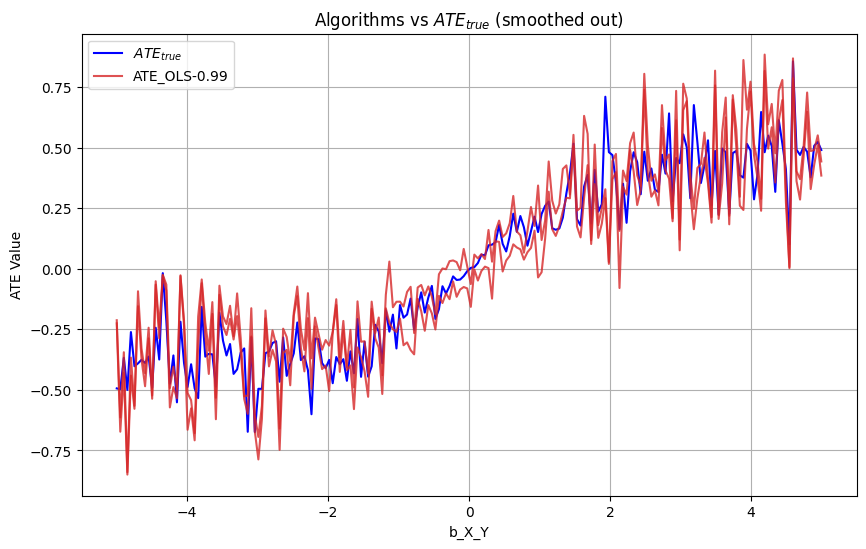

In [35]:
query = 'ATE'
algs = scenario.get_algorithms(query)
PlottingUtil.print_bound_statistics_table(scenario.data, algs)
PlottingUtil.plot_smoothed_query_vs_bounds(scenario.data, query, algs, window=1)

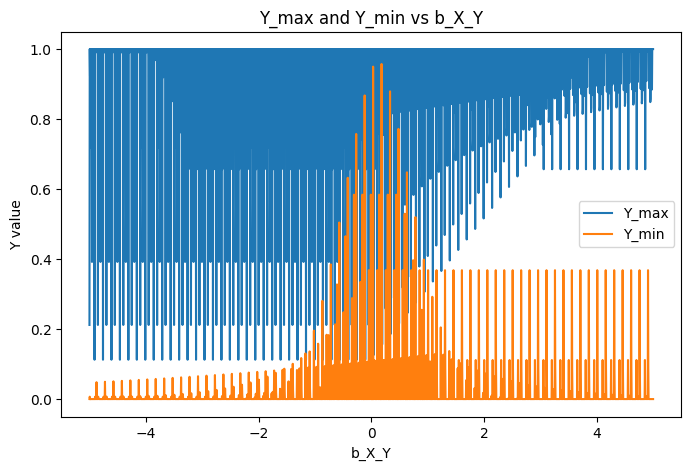

In [107]:
import matplotlib.pyplot as plt

y_label = 'Y'
plt.figure(figsize=(8, 5))
plt.plot(data['b_X_Y'], data[f'{y_label}_max'], label=f'{y_label}_max')
plt.plot(data['b_X_Y'], data[f'{y_label}_min'], label=f'{y_label}_min')
# plt.plot(data['b_X_Y'], data[f'{y_label}_mean'], 'o-', label=f'{y_label}_mean')
plt.xlabel('b_X_Y')
plt.ylabel(f'{y_label} value')
plt.title(f'{y_label}_max and {y_label}_min vs b_X_Y')
plt.legend()
plt.show()

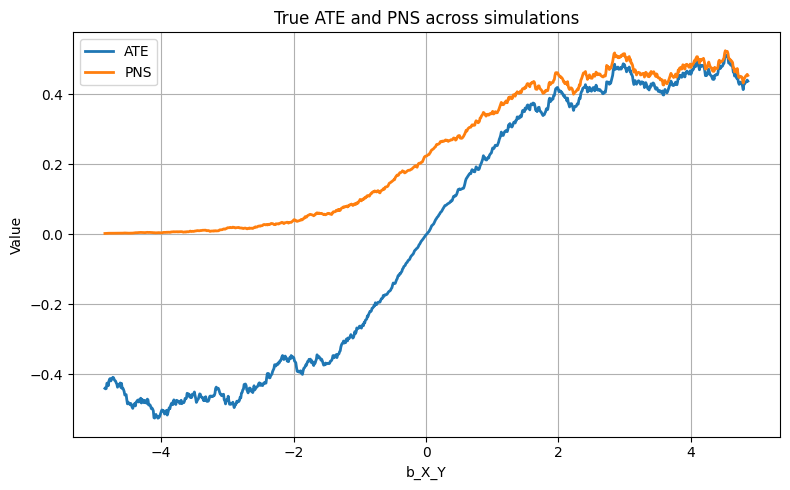

In [49]:
data = BinaryIV.generate_data_rolling_ate(1000, b_lower=-5, b_upper=5)

PlottingUtil.plot_ate_pns(data, window=30)